<a href="https://colab.research.google.com/github/amol004/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **By -**             AMOL
####  **Cohort -** Cairo

# **Project Summary -**

# **GitHub Link -** https://github.com/amol004/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING.git

Provide your GitHub Link here.

# **Problem Statement**


The Netflix movies and TV series that are accessible as of 2019 are included in this dataset. The third-party Netflix search engine Flixable is where the dataset was gathered.

An intriguing analysis was issued in 2018 indicating that since 2010, the quantity of TV series available on Netflix has almost tripled. Since 2010, the number of movies available on the streaming service has dropped by over 2,000, but the number of TV series has increased by about three times. Investigating what further insights might be gleaned from the same dataset will be interesting.

Many intriguing insights can also be obtained by integrating this dataset with other external datasets, such as rotten tomatoes and IMDB ratings.

**Our goal is to carry out an exploratory data analysis to find out what content is accessible in various nations and whether Netflix has been concentrating more on TV shows than movies lately. Then group related content by matching text-based attributes using these insights.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [51]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30
#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error
# For Hypothesis
from scipy.stats import *
import math
# library used for textual data prerocessing
import string,re,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize, TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# library used for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [53]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [54]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [55]:
# Dataset Rows & Columns count
np.shape(df)

(7787, 12)

### Dataset Information

In [56]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [57]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

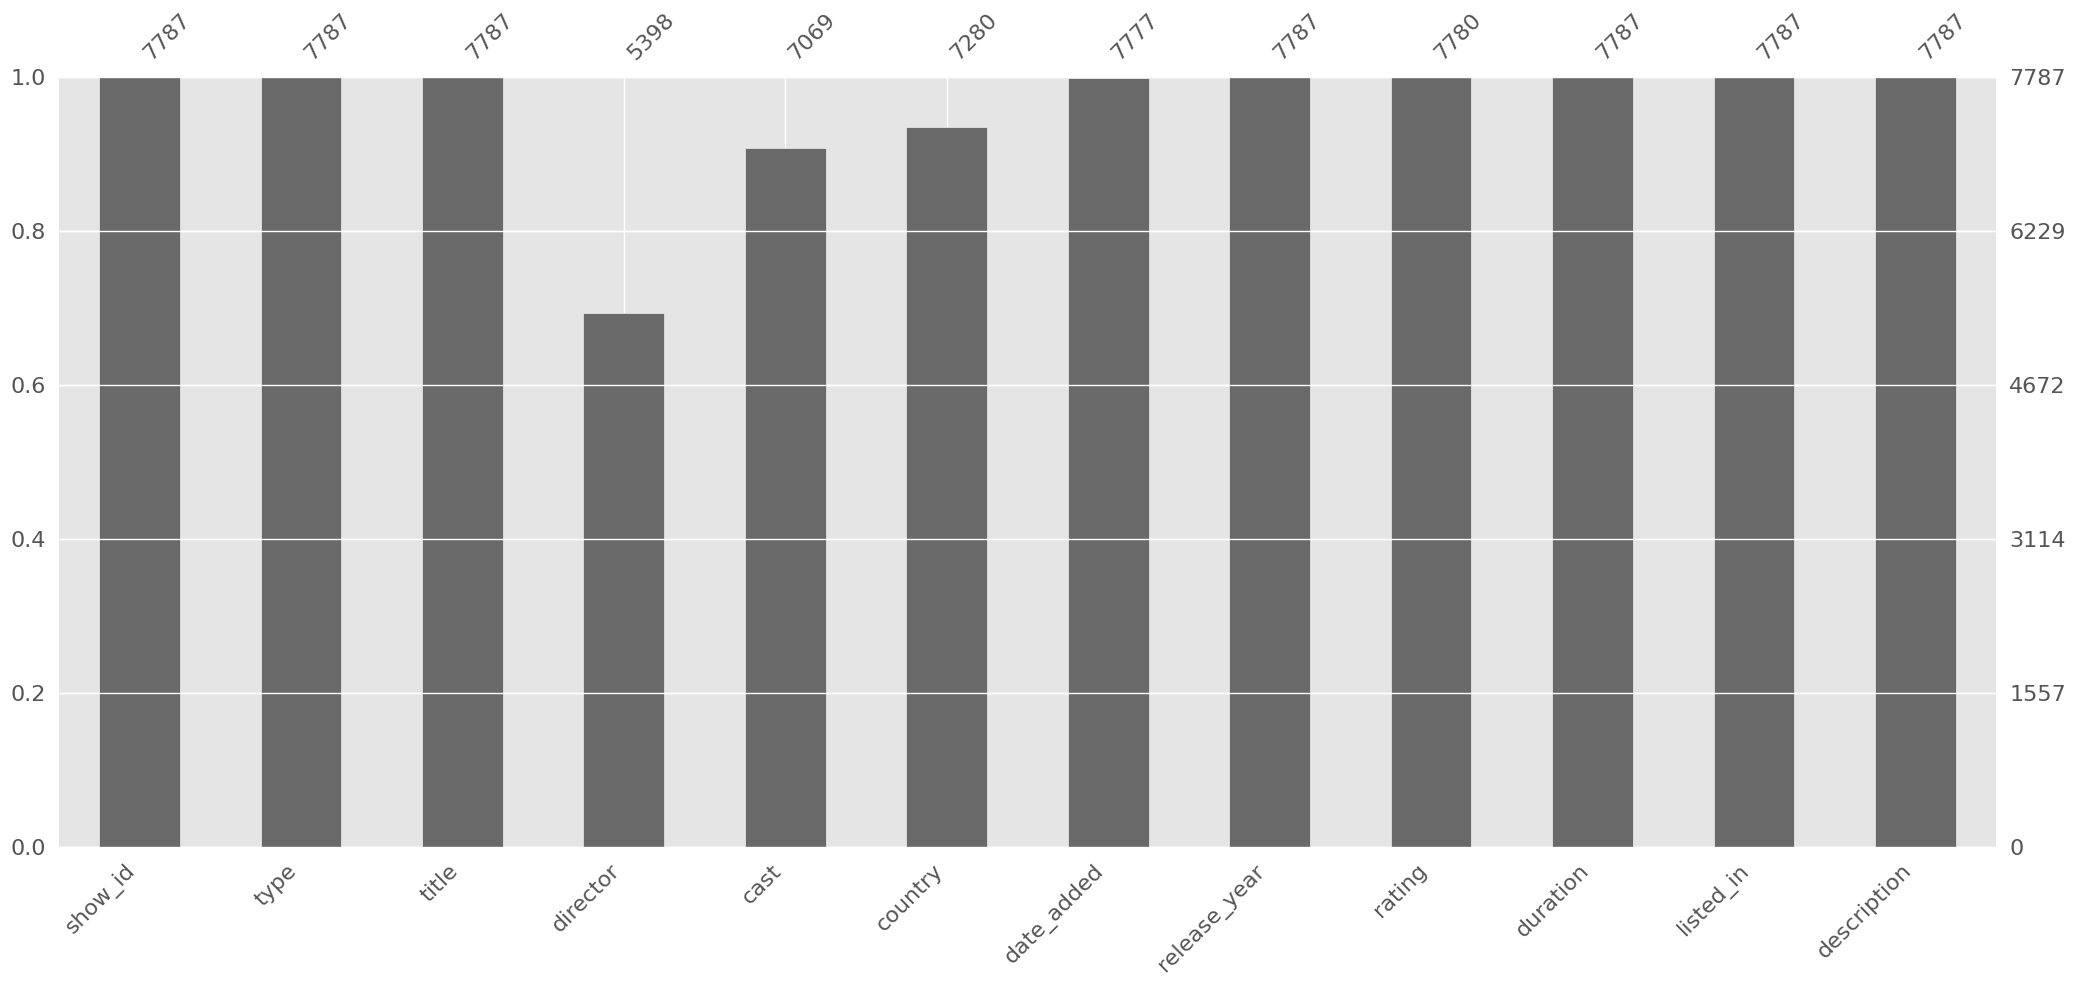

In [59]:
# Visualizing the missing values
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(df);

In [60]:
# Handling Missing values to make our Dataset Manageable.

# For Categorical columns we will impute "Missing" in place of NaN
df[['director','cast','country']] = df[['director','cast','country']].fillna('Missing')

# For Rating column we will impute 0 in place of NaN
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Droping the remaining null values.
df.dropna(axis=0,inplace = True)

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [61]:
# Dataset Columns
pd.DataFrame(df.columns).rename(columns = {0: 'column names'})


,column names
0,show_id
1,type
2,title
3,director
4,cast
5,country
6,date_added
7,release_year
8,rating
9,duration


In [62]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,s1,Movie,3%,Missing,Missing,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [63]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a

In [64]:
unique_values(df)

COLUMN NAME (show_id): 7777 unique values
COLUMN NAME (type): 2 unique values
COLUMN NAME (title): 7777 unique values
COLUMN NAME (director): 4050 unique values
COLUMN NAME (cast): 6822 unique values
COLUMN NAME (country): 682 unique values
COLUMN NAME (date_added): 1565 unique values
COLUMN NAME (release_year): 73 unique values
COLUMN NAME (rating): 14 unique values
COLUMN NAME (duration): 216 unique values
COLUMN NAME (listed_in): 491 unique values
COLUMN NAME (description): 7759 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [66]:
#Adding Month number,month name and year number column from date_added column

#Extracting month number
df['month_number'] = df['date_added'].dt.month
#Extracting month name
df['month_name'] = df['date_added'].dt.month_name()
#Extracting year number
df['year_number'] = df['date_added'].dt.year

In [67]:
#changing datatype from object to string
df['country'] = df['country'].astype(str)
# extracting just the first country to create a new column country_name
df['country_name'] = df['country'].apply(lambda x: x.split(",")[0])

In [68]:
#changing datatype from object to string
df['cast'] = df['cast'].astype(str)
# Retrieving just the first i.e the main actor/actress from the cast
df['lead_actor'] = df['cast'].apply(lambda x: x.split(",")[0])

In [69]:
rating_ages = {'TV-PG': 'Older Kids',
               'TV-MA': 'Adults',
               'TV-Y7-FV': 'Older Kids',
               'TV-Y7': 'Older Kids',
               'TV-14': 'Young Adults',
               'R': 'Adults',
               'TV-Y': 'Kids',
               'NR': 'Adults',
               'PG-13': 'Teens',
               'TV-G': 'Kids',
               'PG': 'Older Kids',
               'G': 'Kids',
               'UR': 'Adults',
               'NC-17': 'Adults'}
df['rating'].replace(rating_ages, inplace = True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

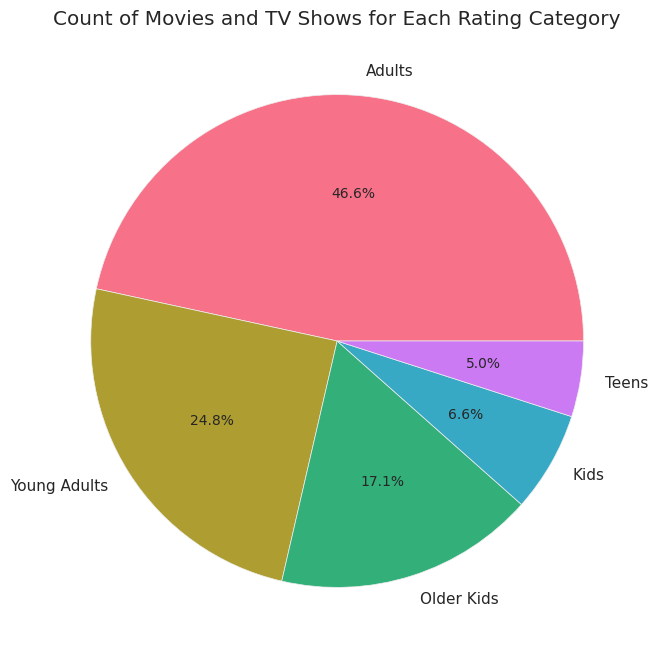

In [70]:
# Chart - 1 visualization code
# Univariate Analysis
# Pie Chart to visualize the count of movies and tv shows for each rating category.
plt.figure(figsize=(10,8))
labels = df['rating'].value_counts().index
sizes = df['rating'].value_counts().values
colors = sns.color_palette('husl', len(labels))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Count of Movies and TV Shows for Each Rating Category')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

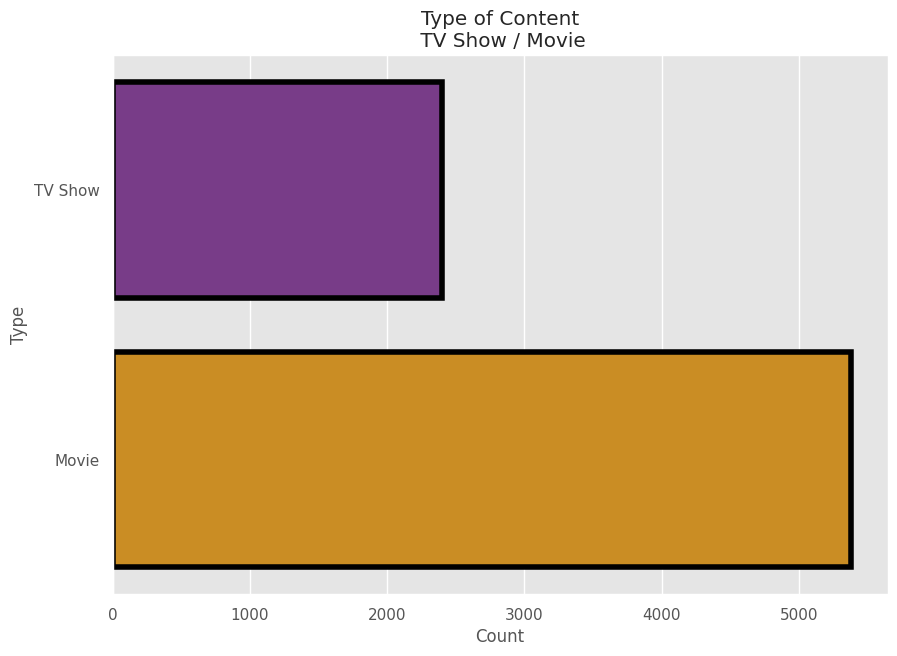

In [72]:
# Chart - 2 visualization code
# Countplot to visualize the number of movies and tv_shows in type column.
plt.figure(figsize=(10,7))
sns.countplot(df["type"],palette="CMRmap",ec="black",lw=4)
plt.title('Type of Content\n TV Show / Movie')
plt.xlabel('Count')
plt.ylabel('Type');



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

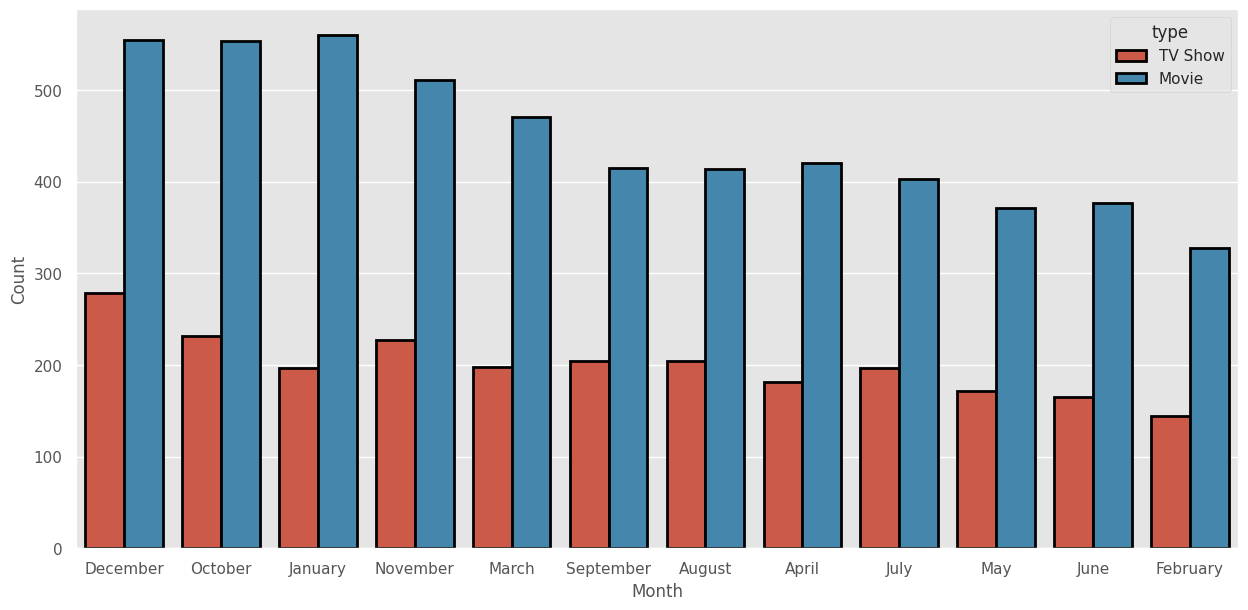

In [76]:
# Chart - 3 visualization code
# Plotting the Countplot
plt.figure(figsize=(15,7))
sns.countplot(data = df,x ='month_name', hue='type',lw=2, ec='black',order = df['month_name'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***